# Exploratory data analysis (EDA)

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../Data/Raw/owid-covid-data.csv')


In [21]:
# Drop all rows where date is not equal to 01.10.2020
data.drop(data[data['date'] != "2020-10-01"].index, inplace = True) 

### Columns to consider dropping: 

iso_code

date

new_cases

new_cases_smoothed

### Rows to consider dropping: 

World

International

In [22]:
# Drop columns
data.drop(['iso_code', 'date', 'new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed','new_cases_per_million', 'new_cases_smoothed_per_million','new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'location', 'continent', 'total_cases', 'total_deaths', 'total_tests'], axis=1, inplace=True)

In [23]:
# Drop rows
#data.drop(data[data['location'] == "World"].index, inplace = True) 
#data.drop(data[data['location'] == "International"].index, inplace = True) 

Left with one categorical feature

tests_units --> This feature has some strange values that is not that intuitive. E.g what is the difference between "people tested" and "tests performed"? Will however keep this feature for now, despite a high number of NaN's.

In [24]:
data.tests_units.value_counts()

tests performed                  56
samples tested                   22
people tested                    17
units unclear                     2
people tested (incl. non-PCR)     2
Name: tests_units, dtype: int64

In [25]:
# One hot encoding to convert from categorical to numerical data.
data = pd.get_dummies(data)

In [26]:
data.shape

(212, 26)

### Impute our data to remove any NaN

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)

IterativeImputer(random_state=0)

In [28]:
imputed_df = imp_mean.transform(data)
data = pd.DataFrame(imputed_df, columns=data.columns)

### Scale data

In [29]:
from sklearn import preprocessing


x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

In [30]:
data.describe()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,tests_units_people tested,tests_units_people tested (incl. non-PCR),tests_units_samples tested,tests_units_tests performed,tests_units_units unclear
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.127975,0.107716,0.098727,0.218013,0.284041,0.332612,0.009456,0.018599,0.476373,0.298155,...,0.355651,0.384759,0.207972,0.605041,0.613393,0.080189,0.009434,0.103774,0.264151,0.009434
std,0.171390,0.158476,0.121717,0.075511,0.124521,0.139015,0.070734,0.078992,0.260075,0.224128,...,0.161260,0.178141,0.164217,0.223197,0.249364,0.272228,0.096898,0.305688,0.441924,0.096898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013483,0.012303,0.020177,0.196558,0.204819,0.252667,0.000143,0.002183,0.252266,0.096468,...,0.267401,0.271406,0.094526,0.486630,0.423205,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.064645,0.043600,0.062515,0.210115,0.263504,0.320844,0.000903,0.005013,0.484667,0.254989,...,0.350624,0.438372,0.182847,0.649686,0.666110,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.173393,0.144090,0.132502,0.218505,0.336651,0.423178,0.003442,0.013215,0.693353,0.465624,...,0.427557,0.506435,0.264599,0.766134,0.798502,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

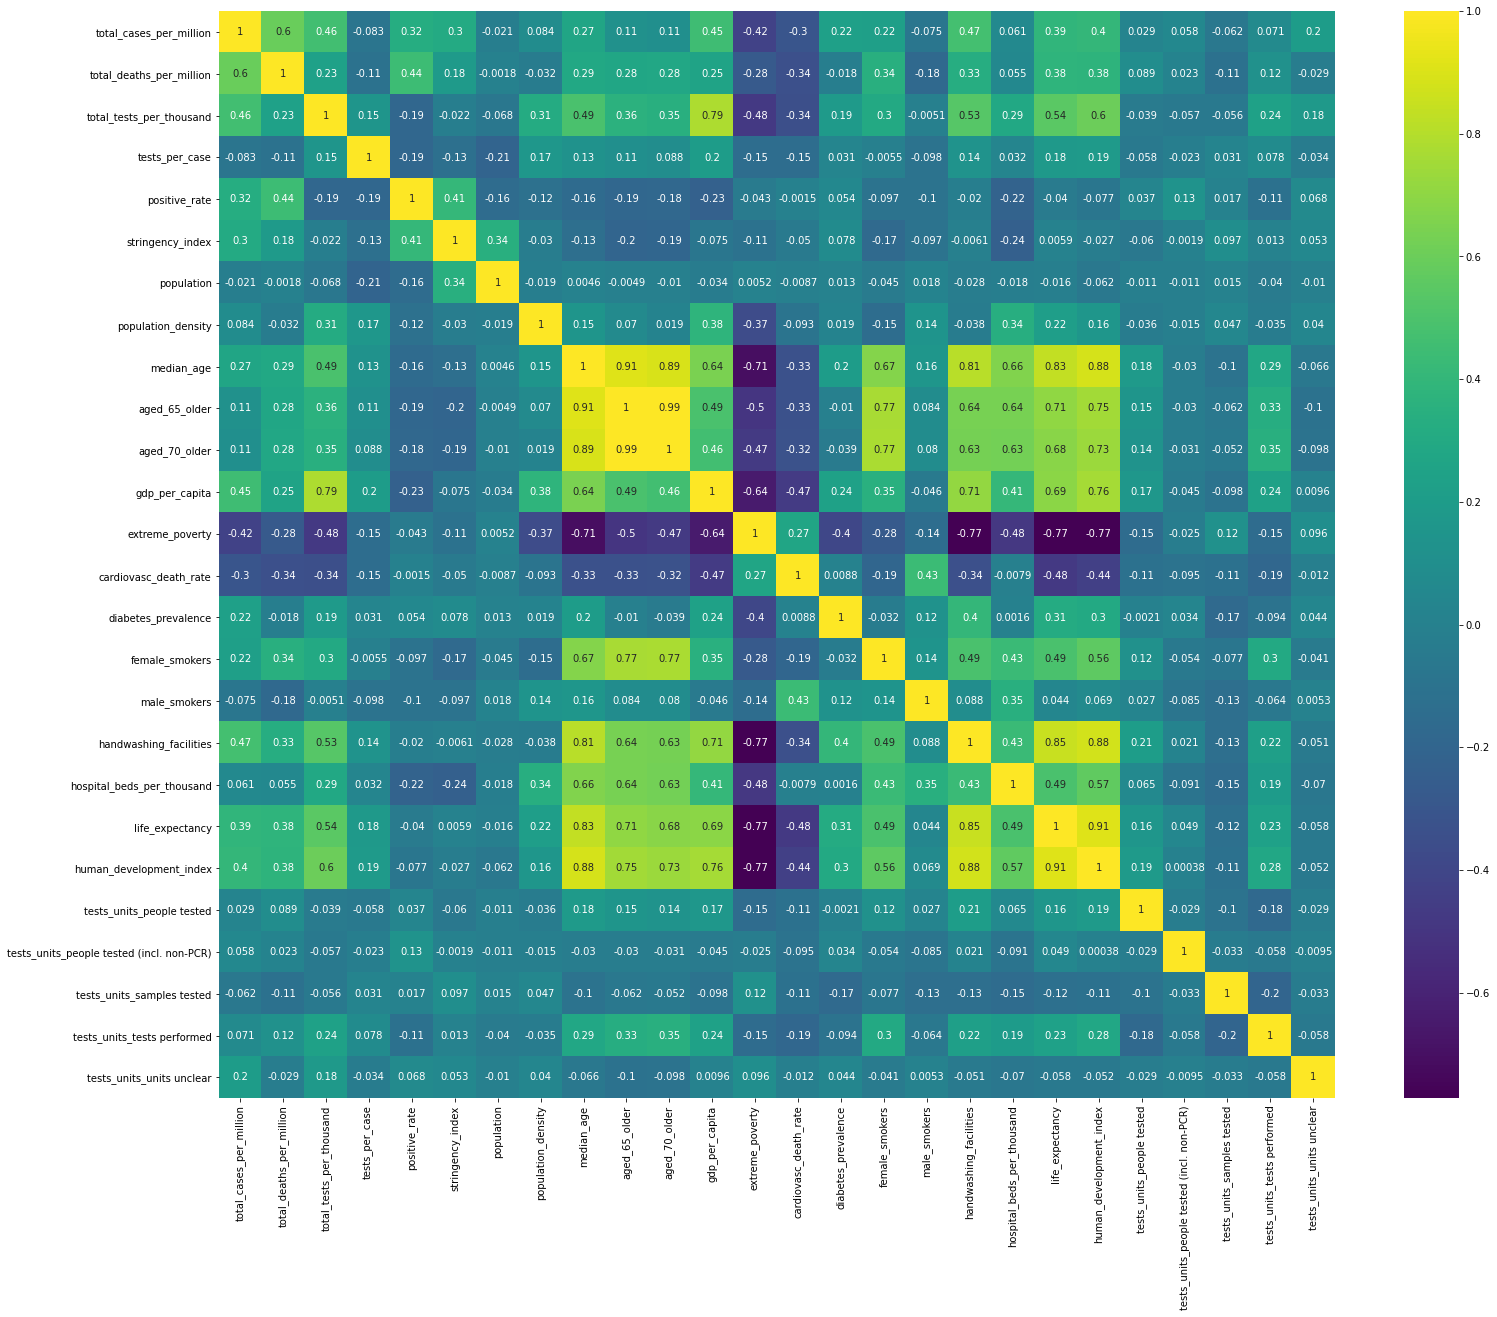

In [31]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [32]:
data.to_csv("../Data/Processed/processed.csv", index=False)